In [1]:
import os, sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt

import neurons

In [2]:
net = neurons.Network()
net.add(neurons.Sensory, 50, 'input_1')
net.add(neurons.Sensory, 50, 'input_2')
net.add(neurons.LIFrate, 10, 'neurons',
    v_rest=-70,
    v_thres=-55,
    R=25,
    tau_s=10,
    gamma=0.5,
    theta=0.5
)
net.connect('input_1', 'neurons')
net.connect('input_2', 'neurons')
net.compile()

initializing neurons... done.
checking if graph is connected... done.
initializing history... done.
model successfully compiled.



In [3]:
net.train = True

In [4]:
seconds = 10
dt = 0.001 # 1 ms

net.reset_history()
steps = int(seconds / dt)
for i in range(steps):
    if i*dt == 1:
        net.bundles['input_1'].outputs[:] = 1
        net.bundles['input_2'].outputs[:] = 0
    if i*dt == 4:
        net.bundles['input_1'].outputs[:] = 0
        net.bundles['input_2'].outputs[:] = 0
    if i*dt == 5:
        net.bundles['input_1'].outputs[:] = 0
        net.bundles['input_2'].outputs[:] = 1
    if i*dt == 8:
        net.bundles['input_1'].outputs[:] = 0
        net.bundles['input_2'].outputs[:] = 0
    net.step(dt)

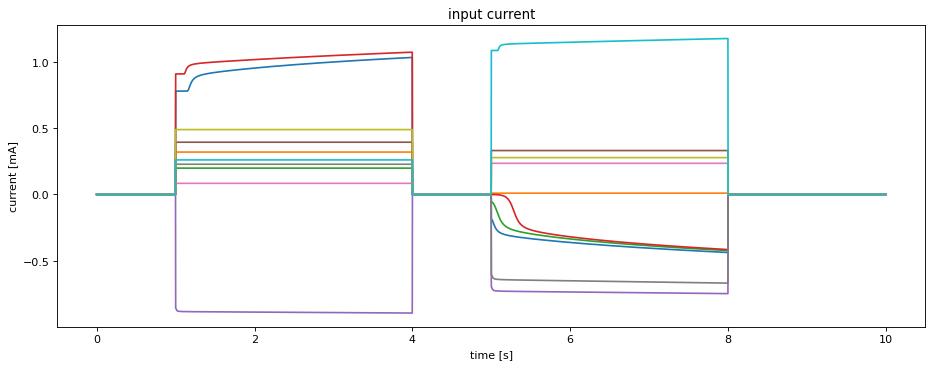

In [5]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('input current')
plt.plot(np.arange(steps) * dt, net.history['neurons'].current)
plt.ylabel('current [mA]')
plt.xlabel('time [s]')
plt.show()

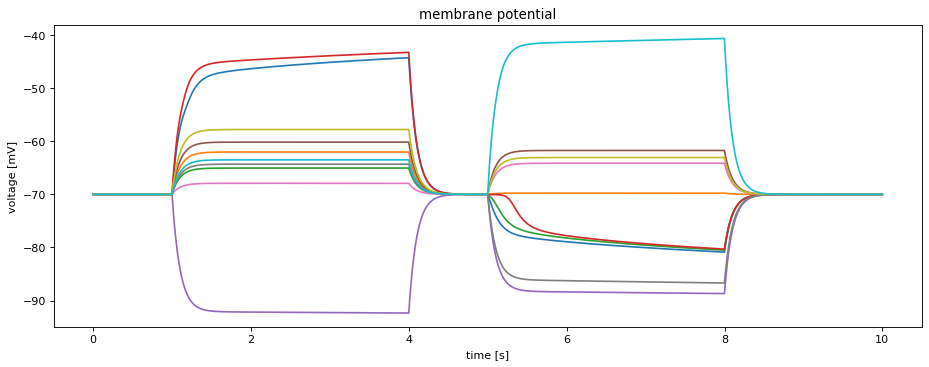

In [6]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('membrane potential')
plt.plot(np.arange(steps) * dt, net.history['neurons'].voltage)
plt.ylabel('voltage [mV]')
plt.xlabel('time [s]')
plt.show()

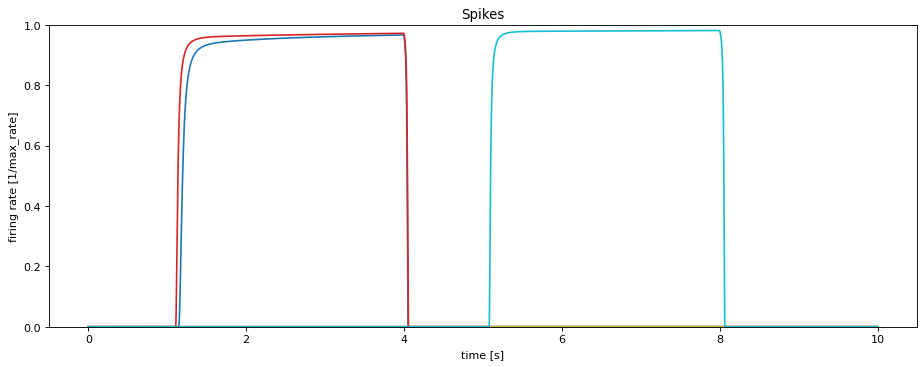

In [7]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('Spikes')
plt.plot(np.arange(steps) * dt, net.history['neurons'].outputs)
plt.ylabel('firing rate [1/max_rate]')
plt.xlabel('time [s]')
plt.ylim(0,1)
plt.show()